## 2. 한글 토크나이징

### 프로그램 및 패키지 설치 목록
- JDK (Java SE Downloads)
- JAVA_HOME 설정
- JPype 설치
- KoNLPy 설치
- Word Cloud 설치
- Matplotlib 설치

### KoNLPy(코엔엘파이) 및 필요 모듈의 설치

* KoNLPy : **pip install konlpy**
* JPype1 : **conda install -c conda-forge jpype1** 
    * 이후 Jupyter Notebook 재실행 필요
* JDK 설치 : Java JDK로 검색해서 OS에 맞춰 설치
    * JAVA_HOME 설정 : 환경변수(path) 설정 필요

In [5]:
!java -version

java version "15.0.1" 2020-10-20
Java(TM) SE Runtime Environment (build 15.0.1+9-18)
Java HotSpot(TM) 64-Bit Server VM (build 15.0.1+9-18, mixed mode, sharing)


In [2]:
!pip install ../JPype1-1.2.0-cp37-cp37m-win_amd64.whl

Processing c:\tensorflow-ml-nlp-tf2\wheels\jpype1-1.2.0-cp36-cp36m-win_amd64.whl
JPype1 is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


- 파이썬 버전 확인

In [1]:
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


### KoNLPy 설치 및 라이브러리 불러오기

In [2]:
#!pip install konlpy

In [3]:
import konlpy

## KoNLPy의 형태소 분석
- KoNLPy는 다음과 같은 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았다.
- Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.  http://semanticweb.kaist.ac.kr/hannanum/
- Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발. http://kkma.snu.ac.kr/
- Komoran: 코모란. Shineware에서 개발.  https://github.com/shin285/KOMORAN
- Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.  https://bitbucket.org/eunjeon/mecab-ko
- Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기. https://github.com/open-korean-text/open-korean-text

### 형태소 분석기 - 3가지 메서드 공통적으로 제공
- nouns : 명사 추출
- morphs : 형태소 추출
- pos : 품사 부착

### 형태소 단위 토크나이징
- Kkma, Komoran, Okt

### 1) Kkma
- 서울대학교 IDS 연구실에서 자연어 처리를 위해 개발한 한국어 형태소 분석기
- 꼬꼬마로 발음하며, GPL v2 라이선스를 따름
- Kkma 객체의 4가지 함수
    - morphs(phrase), nouns(phrase), pos(phrase, flatten=True), sentences(phrase)

In [4]:
from konlpy.tag import Kkma

In [5]:
# 꼬꼬마 형태소 분석기 객체 생성
kkma = Kkma()

In [6]:
text = "아버지가 방에 들어갑니다."

# 형태소 추출
morphs = kkma.morphs(text)
print(morphs)

['아버지', '가', '방', '에', '들어가', 'ㅂ니다', '.']


In [7]:
# 형태소와 품사 태그 추출
pos = kkma.pos(text)
print(pos)

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [8]:
# 부착되는 품사 태그의 기호와 의미는 tagset 속성으로 확인
print(kkma.pos(text, join=True))

['아버지/NNG', '가/JKS', '방/NNG', '에/JKM', '들어가/VV', 'ㅂ니다/EFN', './SF']


In [9]:
%%time
print(kkma.pos(text, join=True))
# 속도 체크, %%time은 맨 위에 줄이어야 작동함

['아버지/NNG', '가/JKS', '방/NNG', '에/JKM', '들어가/VV', 'ㅂ니다/EFN', './SF']
Wall time: 39.9 ms


In [10]:
# 명사만 추출
nouns = kkma.nouns(text)
print(nouns)

['아버지', '방']


In [11]:
# 문장 분리
sentences = "오늘 날씨는 어때요? 내일은 덥다던데."
s = kkma.sentences(sentences)
print(s)

['오늘 날씨는 어 때요?', '내일은 덥다 던데.']


### 2) Komoran(Korean Morphological Analyzer)
- Shineware에서 자바로 개발한 한국어 형태소 분석기
- 코모란으로 발음하며, Apache 라이선스 2.0을 따르는 오픈소스 
- 경량화 버전도 존재하며, 다른 형태소 분석기와 다르게 공백이 포함된 형태소 단위로도 분석이 가능하여 많이 사용
- Komoran 객체의 3가지 함수
    - morphs(phrase), nouns(phrase), pos(phrase, flatten=True)

In [15]:
from konlpy.tag import Komoran

In [16]:
# 코모란 형태소 분석기 객체 생성
komoran = Komoran()

In [20]:
text = "아버지가 방에 들어갑니다."

# 형태소 추출
morphs = komoran.morphs(text)
print(morphs)

['아버지', '가', '방', '에', '들어가', 'ㅂ니다', '.']


In [21]:
# 형태소와 품사 태그 추출
pos = komoran.pos(text)
print(pos)

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [22]:
# 부착되는 품사 태그의 기호와 의미는 tagset 속성으로 확인
komoran.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [23]:
# 명사만 추출
nouns = komoran.nouns(text)
print(nouns)

['아버지', '방']


### 3) Okt(Open-source Korean Text Processor)
- 원래 이름이 Twitter 였으나 0.5.0 버전 이후부터 이름이 Okt로 바뀜
- 트위터에서 개발한 Twitter 한국어 처리기에서 파생된 오픈 소스(아파치 라이선스 2.0) 
- 띄어쓰기가 어느 정도 되어 있는 문장을 빠르게 분석할 때 많이 사용
- Okt 객체의 5가지 함수
    - morphs(), nouns(), phrases(), pos(), normalize()

In [2]:
from konlpy.tag import Okt

In [3]:
# Okt 형태소 분석기 객체 생성
okt = Okt()

In [4]:
text = "아버지가 방에 들어갑니다."

# 형태소 추출
morphs = okt.morphs(text)
print(morphs)

['아버지', '가', '방', '에', '들어갑니다', '.']


In [5]:
# 형태소와 품사 태그 추출
pos = okt.pos(text)
print(pos)

[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어갑니다', 'Verb'), ('.', 'Punctuation')]


In [6]:
# 부착되는 품사 태그의 기호와 의미는 tagset 속성으로 확인
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [7]:
# 명사만 추출
nouns = okt.nouns(text)
print(nouns)

['아버지', '방']


In [9]:
# 정규화, 어구 추출
text = "오늘 날씨가 좋아욬ㅋㅋ"
print(okt.normalize(text))
print(okt.phrases(text))

오늘 날씨가 좋아요ㅋㅋ
['오늘', '오늘 날씨', '좋아욬', '날씨']


In [13]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

## Quiz) 명사와 형용사만 가져오기

In [28]:
# 형용사만 추출
text = '꽃이 아름답습니다.'
pos = kkma.pos(text)
print(pos)


[('꽃', 'NNG'), ('이', 'JKS'), ('아름답', 'VA'), ('습니다', 'EFN'), ('.', 'SF')]
['꽃', '아름답']


In [30]:
# 내가 썼던 코드

#  'NN': '명사',
#  'NNB': '일반 의존 명사',
#  'NNG': '보통명사',
#  'NNM': '단위 의존 명사',
#  'NNP': '고유명사',
#  'VA': '형용사'

word = []
for k in kkma.pos(text, join=True):
    k = k.split('/')
    if k[1] == 'NN':
        word.append(k[0])
    elif k[1] == 'NNB':
        word.append(k[0])
    elif k[1] == 'NNG':
        word.append(k[0])
    elif k[1] == 'NNM':
        word.append(k[0])
    elif k[1] == 'NNP':
        word.append(k[0])
    elif k[1] == 'VA':
        word.append(k[0])
print(word)

['꽃', '아름답']


In [31]:
# 선생표 코드
word = []
for k in kkma.pos(text, join=True): 
    pos = k.split('/')
    tag = pos[1]
    if tag in ['NNG', 'VA']:
        word.append(pos[0])

print(word)

['꽃', '아름답']


In [34]:
# 선생 코드 2
[word.split('/')[0] for word in kkma.pos(text, join=True) if word.split('/')[1] in ['NNG','VA'] ]


print(word)

[]


### 사용자 사전 구축

#### 미등록 단어 형태소 분석

In [10]:
from konlpy.tag import Komoran

komoran = Komoran()
text = "우리 챗봇은 엔엘피를 좋아해."
pos = komoran.pos(text)
print(pos)

[('우리', 'NP'), ('챗봇은', 'NA'), ('엔', 'NNB'), ('엘', 'NNP'), ('피', 'NNG'), ('를', 'JKO'), ('좋아하', 'VV'), ('아', 'EF'), ('.', 'SF')]


- '엔엘피' -> 신규 단어 등록
- user_dic.tsv로 저장

In [ ]:
# [단어] Tab [품사]
# 엔엘피 Tab NNG
# 나는 내일, 어제의 너와 만난다 Tab NNG
# 시삽 

#### 사용자 단어 사전 형태소 분석

In [1]:
from konlpy.tag import Komoran

komoran = Komoran(userdic='./user_dic.tsv')
text = "우리 챗봇은 엔엘피를 좋아해."
pos = komoran.pos(text)
print(pos)

[('우리', 'NP'), ('챗봇은', 'NA'), ('엔엘피', 'NNG'), ('를', 'JKO'), ('좋아하', 'VV'), ('아', 'EF'), ('.', 'SF')]


-----------------------------------------------
### 한국어 말뭉치
- KoNLPy에서는 대한민국 헌법 말뭉치인 kolaw와 국회법안 말뭉치인 kobill을 제공한다. 
- 각 말뭉치가 포함하는 파일의 이름은 fields 메서드로 알 수 있고 open 메서드로 해당 파일의 텍스트를 읽어들인다

In [2]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [3]:
c = kolaw.open('constitution.txt').read()
print(c[:100])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


### 한글 텍스트 마이닝

In [4]:
# 라이브러리 불러오기
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Okt
okt = Okt()

### 파일 읽기

In [5]:
ko_con_test = kolaw.open('constitution.txt').read()

### 명사 추출

In [6]:
tokens_ko = okt.nouns(ko_con_test)
tokens_ko[:30]

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '입',
 '각하',
 '정의',
 '인도',
 '동포',
 '애']

In [7]:
len(tokens_ko), len(set(tokens_ko))

(3882, 929)

### 단어길이가 2 이상인 명사 추출

In [8]:
tokens_ko = [ko for ko in tokens_ko if len(ko) > 1]
tokens_ko[:30]  

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '각하',
 '정의',
 '인도',
 '동포',
 '로써',
 '민족',
 '단결']

In [9]:
len(tokens_ko)

3013

### 불용어 제거

In [10]:
stop_words = ['경우', '거나']
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
tokens_ko[:20]


['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁']

In [11]:
len(tokens_ko)

2983

In [12]:
len(tokens_ko), len(set(tokens_ko))

(2983, 848)

### NLTK 패키지
- NLTK(Natural Language Toolkit) 패키지 : 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지
- NLTK 설명 pdf : https://riptutorial.com/ebook/nltk

### NLTK의 Text 클래스
- 문서 분석에 유용한 여러가지 메서드를 제공
- koNLPy의 형태소 분석기와 NLTK의 Text 클래스를 결합하여 NLTK 기능을 사용할 수도 있다.
--------------------------

- plot 메소드 : 각 단어(토큰)의 사용 빈도를 그래프로 그려준다.
- dispersion_plot 메서드: 단어가 사용된 위치를 시각화한다.
- similar 메서드 : 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾는다.
- common_contexts 메서드 : 두 단어의 공통 문맥을 보는데 사용한다.
- vocab 메서드 : 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 메서드
- most_common 메서드 : 가장 출현 횟수가 높은 단어를 찾는다.


### NLTK의 Text 클래스 사용

In [13]:
from nltk import Text
ko = nltk.Text(tokens_ko, name="대한민국 헌법")
ko.vocab().most_common(10)

[('법률', 127),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('헌법', 53),
 ('모든', 37),
 ('기타', 26),
 ('사항', 23),
 ('권리', 21)]

In [14]:
# 특정 단어의 빈도수 출력


### dispersion_plot 메서드: 단어가 사용된 위치를 시각화 

#### 한글 폰트 설치

In [15]:
# 한글 폰트 설정 
import platform
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':    # 맥OS인 경우 폰트 변경
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # 윈도우인 경우 폰트 변경
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
plt.rcParams['axes.unicode_minus'] = False    

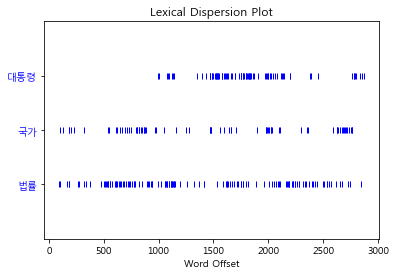

### similar 메서드: 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾는다.

In [16]:
ko.similar('헌법')

의결 요건 공포 행위 집회 임기 정기회 제출 자격 정년


### common_contexts 메서드 : 두 단어의 공통 문맥을 보려면 를 사용한다.

In [17]:
ko.similar('대통령')

국회의원 국가 법관 기타 근로자 의장 자문 지명 주재 대법원 퇴직


### 텍스트 분석 시각화 : 단어 빈도 그래프 및 워드 클라우드
- wordcloud 패키지를 사용하면 단어의 사용 빈도수에 따라 워드클라우드(Word Cloud) 시각화를 할 수 있다.

In [18]:
# 기본 글꼴 변경
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [19]:
print (plt.rcParams['font.family'] )

['NanumBarunGothic']


### 단어 빈도로 챠트 그리기

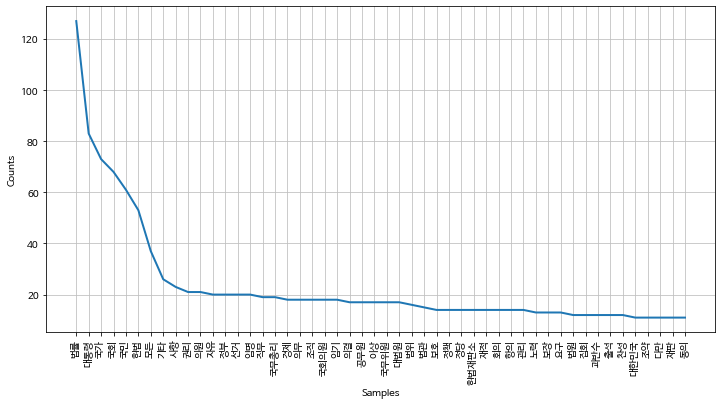

In [20]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

### 워드 클라우드

In [21]:
# 워드 클라우드 라이브러리 설치
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

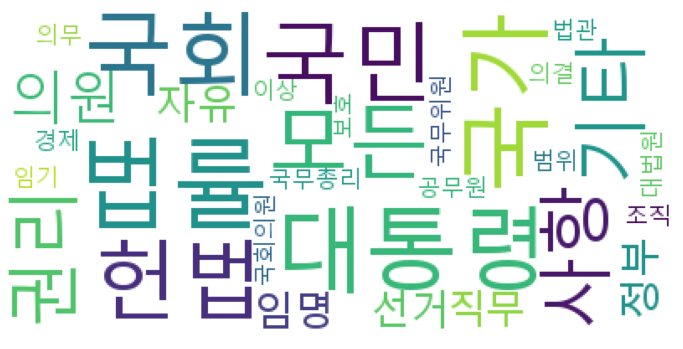

In [31]:
data = ko.vocab().most_common(30) # 빈도수가 가장 높은 단어 30개만 추출
tmp_data = dict(data)

wordcloud = WordCloud(font_path= "c:/Windows/Fonts/malgun.ttf",
                    #   font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(tmp_data)

plt.figure(figsize=(12,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

---------------------------------------------------
### KoNLPy 코퍼스 활용 예제 2) 
- kolaw: 한글 법률 말뭉치, 'constitution.txt' 파일로 저장되어 있음
-  kobill: 대한민국 국회의안 말뭉치

In [32]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

- 앞에서 부터 20개만 불러오기

In [33]:
kolaw.open('constitution.txt').read()[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

In [34]:
kobill.open('1809890.txt').read()[:100]

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이'

### KoNLPy 데이타를 이용한 형태소 분석

In [35]:
text = kolaw.open('constitution.txt').read()

In [36]:
co = okt.morphs(text)
len(co)

8796

In [27]:
nouns = okt.nouns(text)
len(nouns)

3882

In [28]:
len(set(nouns)) # 중복 제거

929

### collectons을 이용한 빈도 세기

In [40]:
import collections

nouns = okt.nouns(text)
stat = collections.Counter(nouns)
stat.most_common(10)

[('제', 175),
 ('법률', 127),
 ('정', 89),
 ('수', 88),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('때', 55)]

### 활용예제) 육아 휴직 관련 법안에 대한 분석

### 1) 데이타 불러오기

In [126]:
import nltk
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [127]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

### 2) 명사 추출하기

In [128]:
from konlpy.tag import Kkma
kkma = Kkma()

tokens_ko = kkma.nouns(doc_ko)
tokens_ko

['지방',
 '지방공무원법',
 '공무원',
 '법',
 '일부',
 '일부개정법률안',
 '개정',
 '법률안',
 '정의',
 '정의화의원',
 '화',
 '의원',
 '대표',
 '대표발의',
 '발의',
 '의',
 '안',
 '호',
 '9890',
 '발',
 '연월일',
 '2010',
 '11',
 '12',
 '자',
 '정의화',
 '이명수',
 '김',
 '동',
 '이사철',
 '여',
 '여상규',
 '상규',
 '안규백',
 '규',
 '백',
 '황',
 '황영철',
 '영철',
 '박',
 '박영아',
 '영아',
 '김정훈',
 '정훈',
 '김학송',
 '학',
 '송',
 '10',
 '10인',
 '인',
 '제안',
 '제안이유',
 '이유',
 '주요',
 '주요내용',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑과',
 '보살핌',
 '필요',
 '나이',
 '현재',
 '자녀',
 '양육',
 '육아',
 '육아휴직',
 '휴직',
 '수',
 '만',
 '6',
 '6세',
 '세',
 '이하',
 '해당',
 '부모님',
 '일자리',
 '이',
 '출산',
 '욕',
 '저하',
 '문제',
 '가능',
 '연령',
 '8',
 '8세',
 '제',
 '제63조제',
 '63',
 '조',
 '2',
 '2항',
 '항',
 '4',
 '4호',
 '호',
 '1',
 '법률',
 '다음',
 '저',
 '63조제2',
 '중',
 '취학',
 '전',
 '을',
 '2학년',
 '학년',
 '로',
 '부',
 '칙',
 '공포',
 '날',
 '시행',
 '3',
 '신',
 '구조',
 '구조문대비표',
 '문',
 '대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제63조',
 '생',
 '략',
 '63조',
 '현행',
 '호의',
 '하나에',
 '사유',
 '휴',
 '직',
 '임용권',
 '대통령령',
 '특별',
 '사정',
 '취',
 '위

### 3) 수집된 명사 단어 수, 고유한 명사 단어 수 

In [129]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [130]:
print(len(ko.tokens))
print(len(set(ko.tokens)))

417
408


In [131]:
ko.vocab()

FreqDist({'이': 3, '호': 2, '여': 2, '수': 2, '조': 2, '년': 2, '월': 2, '명': 2, '지방': 1, '지방공무원법': 1, ...})

### 4) 단어 빈도 그래프 그리기

#### 한글 폰트 설치

In [115]:
# 한글 폰트 설정 
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':    # 맥OS인 경우 폰트 변경
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # 윈도우인 경우 폰트 변경
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

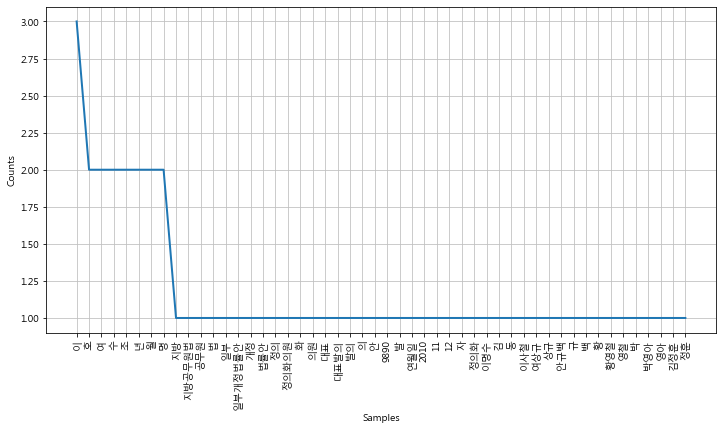

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

### 5) 불용어 제거 후 그래프 그리기

In [133]:
stop_words = ['이', '호', '여', '수', '조', '년', '월', '명']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방',
 '지방공무원법',
 '공무원',
 '법',
 '일부',
 '일부개정법률안',
 '개정',
 '법률안',
 '정의',
 '정의화의원',
 '화',
 '의원',
 '대표',
 '대표발의',
 '발의',
 '의',
 '안',
 '9890',
 '발',
 '연월일',
 '2010',
 '11',
 '12',
 '자',
 '정의화',
 '이명수',
 '김',
 '동',
 '이사철',
 '여상규',
 '상규',
 '안규백',
 '규',
 '백',
 '황',
 '황영철',
 '영철',
 '박',
 '박영아',
 '영아',
 '김정훈',
 '정훈',
 '김학송',
 '학',
 '송',
 '10',
 '10인',
 '인',
 '제안',
 '제안이유',
 '이유',
 '주요',
 '주요내용',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑과',
 '보살핌',
 '필요',
 '나이',
 '현재',
 '자녀',
 '양육',
 '육아',
 '육아휴직',
 '휴직',
 '만',
 '6',
 '6세',
 '세',
 '이하',
 '해당',
 '부모님',
 '일자리',
 '출산',
 '욕',
 '저하',
 '문제',
 '가능',
 '연령',
 '8',
 '8세',
 '제',
 '제63조제',
 '63',
 '2',
 '2항',
 '항',
 '4',
 '4호',
 '1',
 '법률',
 '다음',
 '저',
 '63조제2',
 '중',
 '취학',
 '전',
 '을',
 '2학년',
 '학년',
 '로',
 '부',
 '칙',
 '공포',
 '날',
 '시행',
 '3',
 '신',
 '구조',
 '구조문대비표',
 '문',
 '대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제63조',
 '생',
 '략',
 '63조',
 '현행',
 '호의',
 '하나에',
 '사유',
 '휴',
 '직',
 '임용권',
 '대통령령',
 '특별',
 '사정',
 '취',
 '위하',
 '여자',
 '여자공무원',
 '임신',
 '때',
 '

In [134]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

In [135]:
print(len(ko.tokens))
print(len(set(ko.tokens)))

400
400


In [136]:
ko.vocab()

FreqDist({'지방': 1, '지방공무원법': 1, '공무원': 1, '법': 1, '일부': 1, '일부개정법률안': 1, '개정': 1, '법률안': 1, '정의': 1, '정의화의원': 1, ...})

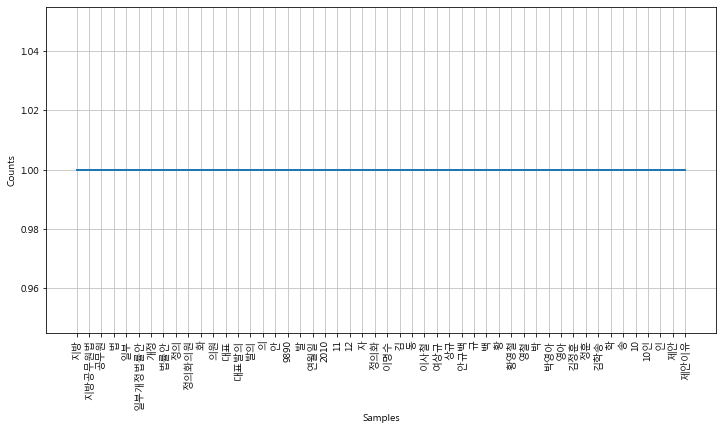

In [124]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

### 6) 단어 빈도수 세기

In [125]:
ko.count('초등학교')

1

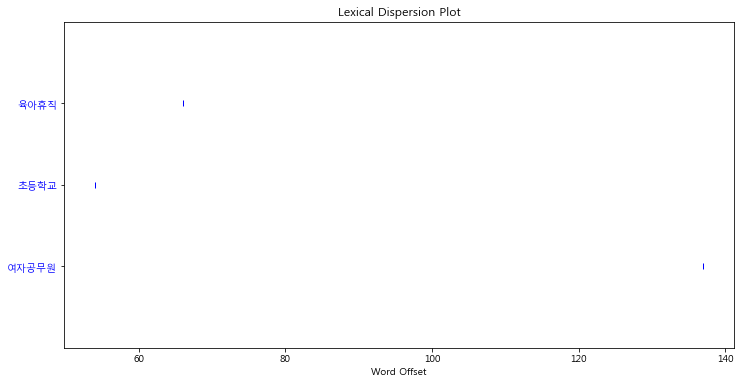

In [137]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '여자공무원'])

In [138]:
## 주변부 단어 확인
ko.concordance('초등학교')

Displaying 1 of 1 matches:
송 학 송 10 10인 인 제안 제안이유 이유 주요 주요내용 내용 초등학교 저학년 경우 부모 사랑과 보살핌 필요 나이 현재 자녀 양육 육아 


In [139]:
# 문서 내의 어떤 단어들이 연어(collocation)로 사용되었는지 확인
ko.collocations()

### 7) 워드 클라우드 그리기

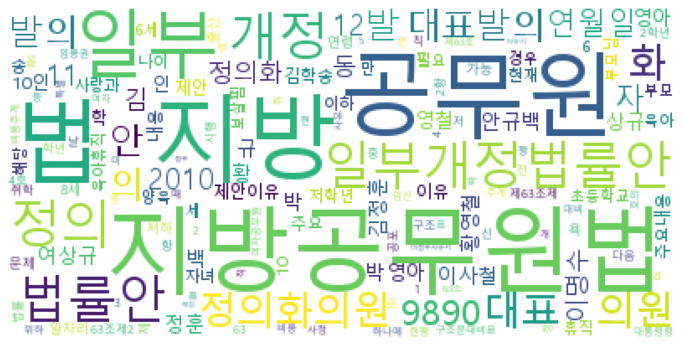

In [142]:
import matplotlib.pyplot as plt
import platform
from wordcloud import WordCloud, STOPWORDS

data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path="c:/windows/fonts/malgun.ttf",
                     relative_scaling = 0.2,
                     background_color = 'white'
                     ).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()